# Shapley Value Attribution Demo

This notebook demonstrates how to use the ShapleyAttribution class to compute channel contributions using Shapley values. The implementation supports three methods:

1. **Full method**: Complete Shapley value calculation when all coalition data is available
2. **Additive method**: Approximation when some coalitions are missing
3. **Grouping method**: Uses average by coalition size when sample sizes are too small

The notebook also shows how to generate and work with simulated data.

## Example 1: Manual Data Input

First, let's see how to use ShapleyAttribution with manually specified data.


In [22]:
import pandas as pd
import numpy as np
from shapley_attribution import ShapleyAttribution
from simulate_data import generate_data, generate_custom_data
from collections import defaultdict
import matplotlib.pyplot as plt

print("Imports successful!")

Imports successful!


In [3]:
# Example input: simulated conversion rates and counts
from collections import defaultdict
from shapley_attribution import ShapleyAttribution
import pandas as pd
channels = ['A', 'B', 'C']
conv_rate = {
    frozenset(): 0.05,
    frozenset(['A']): 0.08,
    frozenset(['B']): 0.10,
    frozenset(['C']): 0.06,
    frozenset(['A','B']): 0.14,
    frozenset(['A','C']): 0.12,
    frozenset(['B','C']): 0.13,
    frozenset(['A','B','C']): 0.18
}
total_counts = defaultdict(int, {k: 10 for k in conv_rate})

attrib = ShapleyAttribution(conv_rate, total_counts, channels)

# Compute Shapley values using different methods
print('Full method:', attrib.compute(method='full'))
print('Additive method:', attrib.compute(method='additive'))
print('Grouping method:', attrib.compute(method='grouping'))
print('\nAuto-selected method:', attrib.compute(method='auto'))

# Get data summary
summary = attrib.get_data_summary()
print('\nData Summary:')
for key, value in summary.items():
    print(f'  {key}: {value}')


Full method: {'A': 0.04333333333333333, 'B': 0.058333333333333334, 'C': 0.02833333333333332}
Additive method: {'A': 0.03, 'B': 0.05, 'C': 0.009999999999999998}
Grouping method: {'A': 0.04333333333333333, 'B': 0.058333333333333334, 'C': 0.02833333333333332}

Auto-selected method: {'A': 0.04333333333333333, 'B': 0.058333333333333334, 'C': 0.02833333333333332}

Data Summary:
  total_coalitions: 8
  available_coalitions: 8
  coverage: 1.0
  sufficient_sample_size: 8
  sufficient_coverage: 1.0
  min_count_threshold: 5


## Example 2: Working with DataFrame

Now let's see how to load data from a pandas DataFrame.


In [4]:
# Create a sample DataFrame
channels = ['A', 'B', 'C']
data = {
    'A': [0, 1, 0, 0, 1, 1, 0, 1],
    'B': [0, 0, 1, 0, 1, 0, 1, 1],
    'C': [0, 0, 0, 1, 0, 1, 1, 1],
    'sample_size': [100, 80, 90, 70, 60, 50, 55, 40],
    'rate': [0.05, 0.08, 0.10, 0.06, 0.14, 0.12, 0.13, 0.18]
}
df = pd.DataFrame(data)
print("Sample DataFrame:")
print(df)
print()

# Create ShapleyAttribution from DataFrame
attrib = ShapleyAttribution.from_dataframe(
    df, 
    channels=channels,
    rate_col='rate',  # Default is 'rate'
    size_col='sample_size',  # Default is 'sample_size'
    min_count=5
)

# Compute Shapley values
shapley_values = attrib.compute(method='auto')
print("Shapley Values:")
for channel, value in shapley_values.items():
    print(f"  {channel}: {value:.6f}")


Sample DataFrame:
   A  B  C  sample_size  rate
0  0  0  0          100  0.05
1  1  0  0           80  0.08
2  0  1  0           90  0.10
3  0  0  1           70  0.06
4  1  1  0           60  0.14
5  1  0  1           50  0.12
6  0  1  1           55  0.13
7  1  1  1           40  0.18

Shapley Values:
  A: 0.043333
  B: 0.058333
  C: 0.028333


## Example 3: Generating Simulated Data

Let's generate different scenarios of simulated data.


In [6]:
# Generate complete data (all coalitions available)
from simulate_data import generate_data
channels = ['A', 'B', 'C', 'D']
df_complete = generate_data(channels, scenario='complete', seed=42)
print(f"Complete scenario: {len(df_complete)} coalitions")
print(df_complete.head(10))
print(f"\nTotal coalitions possible: {2**len(channels)}")
print(f"Coverage: {len(df_complete) / (2**len(channels)) * 100:.1f}%")


Complete scenario: 16 coalitions
   A  B  C  D  sample_size  rate
0  0  0  0  0          152  0.05
1  0  0  0  1          121  0.07
2  0  0  1  0          156  0.07
3  0  0  1  1          166  0.09
4  0  1  0  0           64  0.07
5  0  1  0  1          137  0.09
6  0  1  1  0          124  0.09
7  0  1  1  1          199  0.11
8  1  0  0  0          142  0.07
9  1  0  0  1          171  0.09

Total coalitions possible: 16
Coverage: 100.0%


In [7]:
# Generate data with missing coalitions
df_missing = generate_data(channels, scenario='missing', seed=42)
print(f"Missing data scenario: {len(df_missing)} coalitions")
print(f"Coverage: {len(df_missing) / (2**len(channels)) * 100:.1f}%")
print("\nSample of available coalitions:")
print(df_missing.head(10))


Missing data scenario: 10 coalitions
Coverage: 62.5%

Sample of available coalitions:
   A  B  C  D  sample_size  rate
0  0  0  0  0          152  0.05
1  0  1  0  0           70  0.07
2  0  1  0  1           87  0.09
3  0  1  1  0          102  0.09
4  0  1  1  1           64  0.11
5  1  0  0  0           64  0.07
6  1  0  1  0          149  0.09
7  1  1  0  1          138  0.11
8  1  1  1  0          107  0.11
9  1  1  1  1          100  0.13


In [8]:
# Generate data with small sample sizes
df_small = generate_data(channels, scenario='small_sample', min_count=5, seed=42)
print(f"Small sample scenario: {len(df_small)} coalitions")
print("\nCoalitions with small sample sizes (< 5):")
small_samples = df_small[df_small['sample_size'] < 5]
print(small_samples[['A', 'B', 'C', 'D', 'sample_size', 'rate']])


Small sample scenario: 16 coalitions

Coalitions with small sample sizes (< 5):
    A  B  C  D  sample_size  rate
5   0  1  0  1            2  0.09
7   0  1  1  1            3  0.11
14  1  1  1  0            1  0.11


## Example 4: Computing Shapley Values on Simulated Data

Let's compute Shapley values for each scenario and compare the methods.


In [12]:
# Complete data scenario
print("=" * 60)
print("COMPLETE DATA SCENARIO")
print("=" * 60)
attrib_complete = ShapleyAttribution.from_dataframe(df_complete, channels)
summary = attrib_complete.get_data_summary()
print(f"Coverage: {summary['coverage']*100:.1f}%")
print(f"Sufficient sample size: {summary['sufficient_coverage']*100:.1f}%")
print()

shapley_full = attrib_complete.compute(method='full')
print("Shapley Values (Full method):")
for ch, val in sorted(shapley_full.items()):
    print(f"  {ch}: {val:.6f}")


COMPLETE DATA SCENARIO
Coverage: 100.0%
Sufficient sample size: 100.0%

Shapley Values (Full method):
  A: 0.020000
  B: 0.020000
  C: 0.020000
  D: 0.020000


In [13]:
# Missing data scenario
print("=" * 60)
print("MISSING DATA SCENARIO")
print("=" * 60)
attrib_missing = ShapleyAttribution.from_dataframe(df_missing, channels)
summary = attrib_missing.get_data_summary()
print(f"Coverage: {summary['coverage']*100:.1f}%")
print(f"Auto-selected method: {attrib_missing._select_method()}")
print()

shapley_auto = attrib_missing.compute(method='auto')
shapley_additive = attrib_missing.compute(method='additive')
print("Shapley Values (Auto method):")
for ch, val in sorted(shapley_auto.items()):
    print(f"  {ch}: {val:.6f}")
print()
print("Shapley Values (Additive method):")
for ch, val in sorted(shapley_additive.items()):
    print(f"  {ch}: {val:.6f}")


MISSING DATA SCENARIO
Coverage: 62.5%
Auto-selected method: grouping

Shapley Values (Auto method):
  A: 0.020000
  B: 0.020000
  C: 0.020000
  D: 0.020000

Shapley Values (Additive method):
  A: 0.020000
  B: 0.020000
  C: 0.000000
  D: 0.000000


In [14]:
# Small sample size scenario
print("=" * 60)
print("SMALL SAMPLE SIZE SCENARIO")
print("=" * 60)
attrib_small = ShapleyAttribution.from_dataframe(df_small, channels, min_count=5)
summary = attrib_small.get_data_summary()
print(f"Coverage: {summary['coverage']*100:.1f}%")
print(f"Sufficient sample size: {summary['sufficient_coverage']*100:.1f}%")
print(f"Auto-selected method: {attrib_small._select_method()}")
print()

shapley_grouping = attrib_small.compute(method='grouping')
shapley_full_small = attrib_small.compute(method='full')
print("Shapley Values (Grouping method):")
for ch, val in sorted(shapley_grouping.items()):
    print(f"  {ch}: {val:.6f}")
print()
print("Shapley Values (Full method - for comparison):")
for ch, val in sorted(shapley_full_small.items()):
    print(f"  {ch}: {val:.6f}")


SMALL SAMPLE SIZE SCENARIO
Coverage: 100.0%
Sufficient sample size: 81.2%
Auto-selected method: grouping

Shapley Values (Grouping method):
  A: 0.020000
  B: 0.020000
  C: 0.020000
  D: 0.020000

Shapley Values (Full method - for comparison):
  A: 0.020000
  B: 0.020000
  C: 0.020000
  D: 0.020000


## Example 5: Custom Data Generation

Generate data with specific missing and small sample size coalitions.


In [17]:
# Generate custom data
from simulate_data import generate_custom_data
df_custom = generate_custom_data(
    channels=['A', 'B', 'C'],
    missing_combos=[('A', 'B')],  # Missing AB coalition
    small_sample_combos=[('A', 'C'), ('B', 'C')],  # Small samples for AC and BC
    base_rate=0.05,
    lift_per_channel=0.02,
    default_size=(50, 200),
    small_size=(1, 4),
    seed=42
)

print("Custom generated data:")
print(df_custom)
print()

# Compute Shapley values
attrib_custom = ShapleyAttribution.from_dataframe(df_custom, channels=['A', 'B', 'C'], min_count=5)
print("Data Summary:")
summary = attrib_custom.get_data_summary()
for key, value in summary.items():
    print(f"  {key}: {value}")
print()

shapley_custom = attrib_custom.compute(method='auto')
print("Shapley Values:")
for ch, val in sorted(shapley_custom.items()):
    print(f"  {ch}: {val:.6f}")


Custom generated data:
   A  B  C  sample_size  rate
0  0  0  0          152  0.05
1  0  0  1          156  0.07
2  0  1  0           64  0.07
3  0  1  1            1  0.09
4  1  0  0          142  0.07
5  1  0  1            1  0.09
6  1  1  1          152  0.11

Data Summary:
  total_coalitions: 8
  available_coalitions: 7
  coverage: 0.875
  sufficient_sample_size: 5
  sufficient_coverage: 0.625
  min_count_threshold: 5

Shapley Values:
  A: 0.020000
  B: 0.020000
  C: 0.020000


## Example 6: Visualizing Results

Let's create a simple visualization comparing Shapley values across different methods.


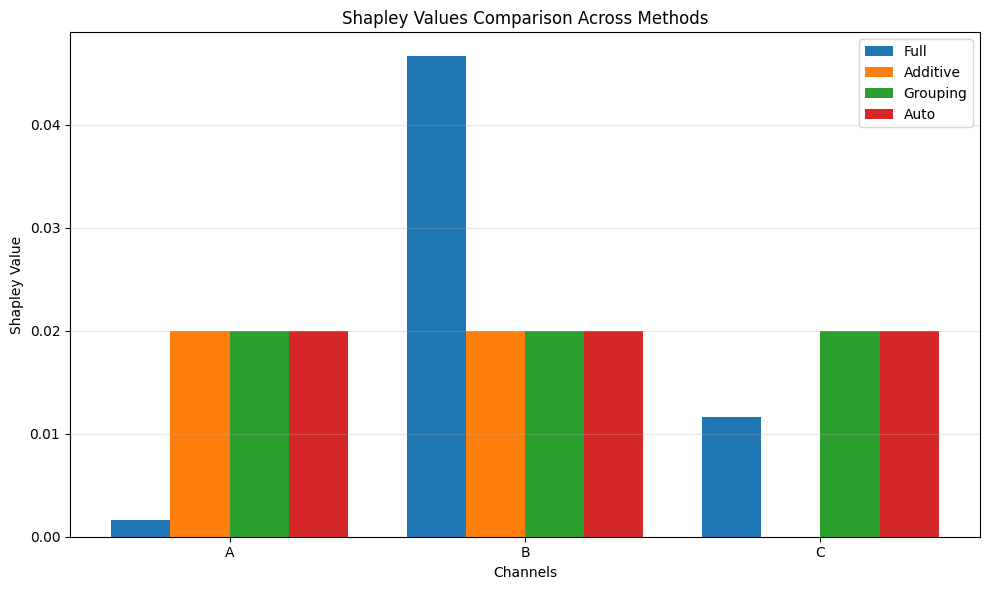

Comparison of methods:

Full:
  A: 0.001667
  B: 0.046667
  C: 0.011667

Additive:
  A: 0.020000
  B: 0.020000
  C: 0.000000

Grouping:
  A: 0.020000
  B: 0.020000
  C: 0.020000

Auto:
  A: 0.020000
  B: 0.020000
  C: 0.020000


In [23]:
import matplotlib.pyplot as plt

# Compare methods on the same dataset
channels = ['A', 'B', 'C']
df_test = generate_data(channels, scenario='mixed', seed=42)
attrib_test = ShapleyAttribution.from_dataframe(df_test, channels, min_count=5)

results = {
    'Full': attrib_test.compute(method='full'),
    'Additive': attrib_test.compute(method='additive'),
    'Grouping': attrib_test.compute(method='grouping'),
    'Auto': attrib_test.compute(method='auto')
}

# Create comparison plot
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(channels))
width = 0.2

for i, (method, values) in enumerate(results.items()):
    vals = [values[ch] for ch in channels]
    ax.bar(x + i*width, vals, width, label=method)

ax.set_xlabel('Channels')
ax.set_ylabel('Shapley Value')
ax.set_title('Shapley Values Comparison Across Methods')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(channels)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Comparison of methods:")
for method, values in results.items():
    print(f"\n{method}:")
    for ch in channels:
        print(f"  {ch}: {values[ch]:.6f}")
